# Defacing pre-registration - Statistical analysis in R

## Load simulated or collected manual ratings

In [ ]:
# Load ratings
df <- read.csv("../../data/S1_Data.tsv", sep="\t")
df

randomized_id,rater_id,dataset,rating,time_sec,artifacts,confidence,comments,defaced,subject
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>
sub-0152_T1w,rater_02,IXI dataset - MRIQC derivatives,2.55,314.549,"[""noise-global"",""inu"",""processing"",""uncategorized""]",2.50,"blurry, smooth image, A bit of signal dropout in frontal",1,72
sub-1051_T1w,rater_02,IXI dataset - MRIQC derivatives,2.85,150.737,"[""noise-local"",""processing""]",3.50,Smooth. but seems to be the case of most of the images of the dataset,0,354
sub-1186_T1w,rater_02,IXI dataset - MRIQC derivatives,2.55,104.950,"[""wrap-around"",""uncategorized""]",3.35,"Slightly short FoV in frontal, bordeline cutting the cortex, Small artefact in the background",0,205
sub-0951_T1w,rater_02,IXI dataset - MRIQC derivatives,3.45,84.569,"[""inu""]",3.50,,1,446
sub-0902_T1w,rater_02,IXI dataset - MRIQC derivatives,2.95,68.889,"[""processing""]",3.50,,1,248
sub-0250_T1w,rater_02,IXI dataset - MRIQC derivatives,2.55,90.318,"[""uncategorized""]",3.15,looks like a bit of drop out in frontal and a bit of background artefact,0,437
sub-0394_T1w,rater_02,IXI dataset - MRIQC derivatives,2.95,97.632,"[""wrap-around"",""processing""]",1.95,FoV cut a bit short in frontal,1,600
sub-0924_T1w,rater_02,IXI dataset - MRIQC derivatives,2.60,79.662,"[""noise-local"",""inu"",""processing""]",3.50,,0,614
sub-0472_T1w,rater_02,IXI dataset - MRIQC derivatives,2.65,100.888,"[""noise-local"",""inu"",""processing""]",2.25,low contrast on some views,0,525


## Repeated-measures ANOVA

Before analyzing the ratings with repeated-measures ANOVA (rm-ANOVA), we have to remove one of the ratings when images where rated twice, bceause rm-ANOVA is not able to deal with duplicates.

In [136]:
library(dplyr)
df$artifacts <- NULL
df$comments <- NULL
df$confidence <- NULL
df$time_sec <- NULL
df$dataset <- NULL
df$randomized_id <- NULL

# When there are two ratings corresponding to one image, keep the first one only, as rm-ANOVA is not able to deal with duplicates
df_nodup <- df[!duplicated(df[c("subject", "defaced", "rater_id")]), ]

### Check assumptions

Repeated-measures ANOVA makes the following three assumptions on the data :
1. **No significant outlier** : By construction the ratings cannot leave the range we define, so this assumption is granted
2. **Normality** : we will have many ratings so by the central theorem this assumption should be ok
3. **Sphericity** : the variance of the differences between groups should be equal.

In [137]:
##Test for normality within each group defined by the intersection of the within-subject factors
library(ggpubr)
for (d in unique(df_nodup$defaced)) {
  for (r in unique(df_nodup$rater_id)) {
    print(paste(d, r))
    print(shapiro.test(df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r,]$rating))
  }
}

[1] "1 rater_02"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r, ]$rating
W = 0.89863, p-value = 6.411e-10

[1] "1 rater_03"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r, ]$rating
W = 0.91411, p-value = 6.356e-09

[1] "1 rater_01"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r, ]$rating
W = 0.90281, p-value = 1.163e-09

[1] "1 rater_04"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r, ]$rating
W = 0.67759, p-value < 2.2e-16

[1] "0 rater_02"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r, ]$rating
W = 0.91087, p-value = 3.853e-09

[1] "0 rater_03"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup$defaced == d & df_nodup$rater_id == r, ]$rating
W = 0.90849, p-value = 2.689e-09

[1] "0 rater_01"

	Shapiro-Wilk normality test

data:  df_nodup[df_nodup

The Shapiro-Wilk normality test reveals that none of the ratings subgroup is normally distributed, let us double-check the non-normality using a Q-Q plot.

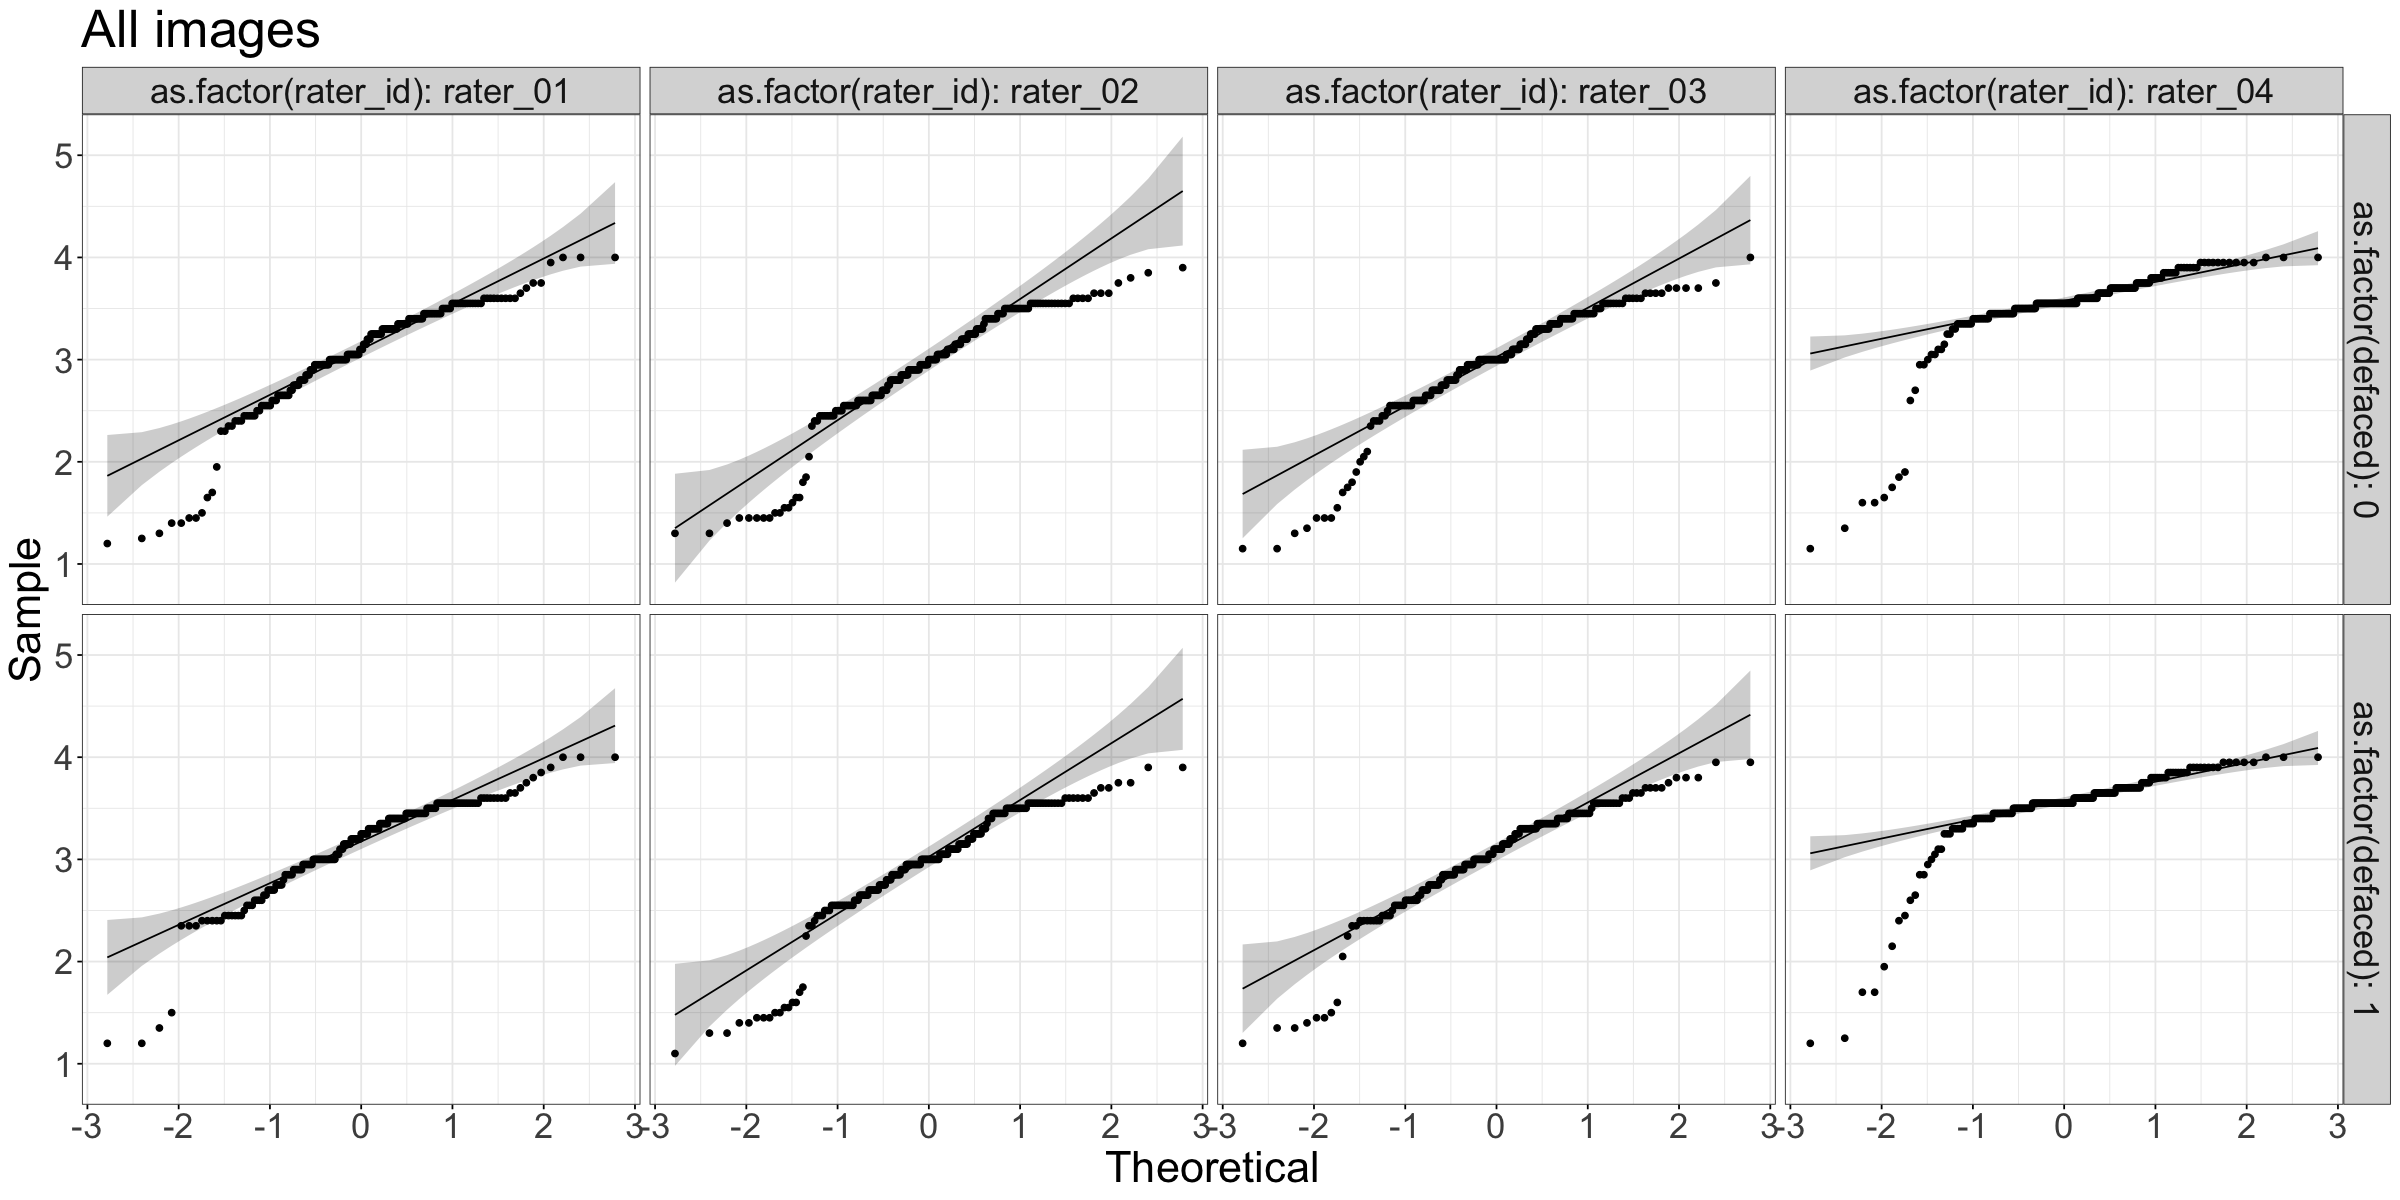

In [138]:
library(ggplot2)
#Increase plot size
options(repr.plot.width=20, repr.plot.height=10)

## Other test for normality
qq <- ggqqplot(df_nodup, "rating", ggtheme = theme_bw()) +
  facet_grid(as.factor(defaced) ~ as.factor(rater_id), labeller = "label_both") +
  theme(text = element_text(size = 26))+
  labs(title = "All images")
suppressWarnings(print(qq))

The ratings do not fall on the reference line confirming that they are not normally distributed. This indicated that the ratings at hand do not respect the normality assumption of ANOVA, as such we cannot use this test and we will have to use the linear mixed effects models.

### Run ANOVA

In [139]:
## Test for sphericity
library(rstatix)

nrow(df_nodup)

suppressWarnings(anova_results <- anova_test(data = df_nodup, dv = rating, wid = subject, within = c(defaced, rater_id), effect.size = "pes"))
print(anova_results)
# Extract p-values
p <- anova_results$ANOVA$p


[1] 1480

ANOVA Table (type III tests)

$ANOVA
            Effect DFn DFd       F        p p<.05   pes
1          defaced   1 184   7.080 8.00e-03     * 0.037
2         rater_id   3 552 158.904 3.09e-74     * 0.463
3 defaced:rater_id   3 552   1.826 1.41e-01       0.010

$`Mauchly's Test for Sphericity`
            Effect     W     p p<.05
1         rater_id 0.942 0.054      
2 defaced:rater_id 0.901 0.002     *

$`Sphericity Corrections`
            Effect   GGe       DF[GG]    p[GG] p[GG]<.05   HFe       DF[HF]
1         rater_id 0.963 2.89, 531.79 1.25e-71         * 0.980 2.94, 541.18
2 defaced:rater_id 0.938 2.81, 517.66 1.45e-01           0.954 2.86, 526.52
     p[HF] p[HF]<.05
1 7.69e-73         *
2 1.44e-01          



For the assumption of sphericity to be verified, the test should not reject the null hypothesis, which is that the variance between group is equal. If any assumption is violated, we will switch to the alternative analysis using linear mixed-effect. 

### Run ANOVA without rater_04

In our exploratory analysis of the manual ratings, we saw that rater_04 present a distribution which is quite different from the other raters. Futhermore, looking at the Q-Q plot, his ratings distribution is the one deviating the most from a normal distribution. As such, we try running the ANOVA while excluding rater_04.

In [140]:
#Remove rater_04
df_nodup_w04 <- df_nodup %>%
  filter(rater_id != "rater_04")
nrow(df_nodup_w04)

suppressWarnings(anova_results <- anova_test(data = df_nodup_w04, dv = rating, wid = subject, within = c(defaced, rater_id), effect.size = "pes"))
print(anova_results)
# Extract p-values
p_w04 <- anova_results$ANOVA$p

[1] 1110

ANOVA Table (type III tests)

$ANOVA
            Effect DFn DFd      F        p p<.05   pes
1          defaced   1 184  7.745 6.00e-03     * 0.040
2         rater_id   2 368 15.023 5.35e-07     * 0.075
3 defaced:rater_id   2 368  1.468 2.32e-01       0.008

$`Mauchly's Test for Sphericity`
            Effect     W     p p<.05
1         rater_id 0.984 0.226      
2 defaced:rater_id 0.980 0.160      

$`Sphericity Corrections`
            Effect   GGe       DF[GG]    p[GG] p[GG]<.05   HFe       DF[HF]
1         rater_id 0.984 1.97, 362.16 6.39e-07         * 0.995 1.99, 366.05
2 defaced:rater_id 0.981 1.96, 360.84 2.32e-01           0.991 1.98, 364.69
     p[HF] p[HF]<.05
1 5.68e-07         *
2 2.32e-01          



Note that in accordance with our previous observation, when excluding rater_04 the sphericity assumption is not violated anymore.

### Run ANOVA with poor quality and excluded scans only

In [141]:
df_nodup_poor <- df_nodup %>%
  filter(rating <= 2.45)
nrow(df_nodup_poor)

[1] 152

In [142]:
##Test for normality within each group defined by the intersection of the within-subject factors
library(ggpubr)
for (d in unique(df_nodup_poor$defaced)) {
  for (r in unique(df_nodup_poor$rater_id)) {
    print(paste(d, r))
    print(shapiro.test(df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r,]$rating))
  }
}

[1] "0 rater_03"

	Shapiro-Wilk normality test

data:  df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r, ]$rating
W = 0.91209, p-value = 0.06039

[1] "0 rater_01"

	Shapiro-Wilk normality test

data:  df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r, ]$rating
W = 0.80392, p-value = 0.000443

[1] "0 rater_04"

	Shapiro-Wilk normality test

data:  df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r, ]$rating
W = 0.92931, p-value = 0.5098

[1] "0 rater_02"

	Shapiro-Wilk normality test

data:  df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r, ]$rating
W = 0.80495, p-value = 0.0001307

[1] "1 rater_03"

	Shapiro-Wilk normality test

data:  df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r, ]$rating
W = 0.74583, p-value = 5.856e-05

[1] "1 rater_01"

	Shapiro-Wilk normality test

data:  df_nodup_poor[df_nodup_poor$defaced == d & df_nodup_poor$rater_id == r, ]$rating
W = 0.60436, p-value

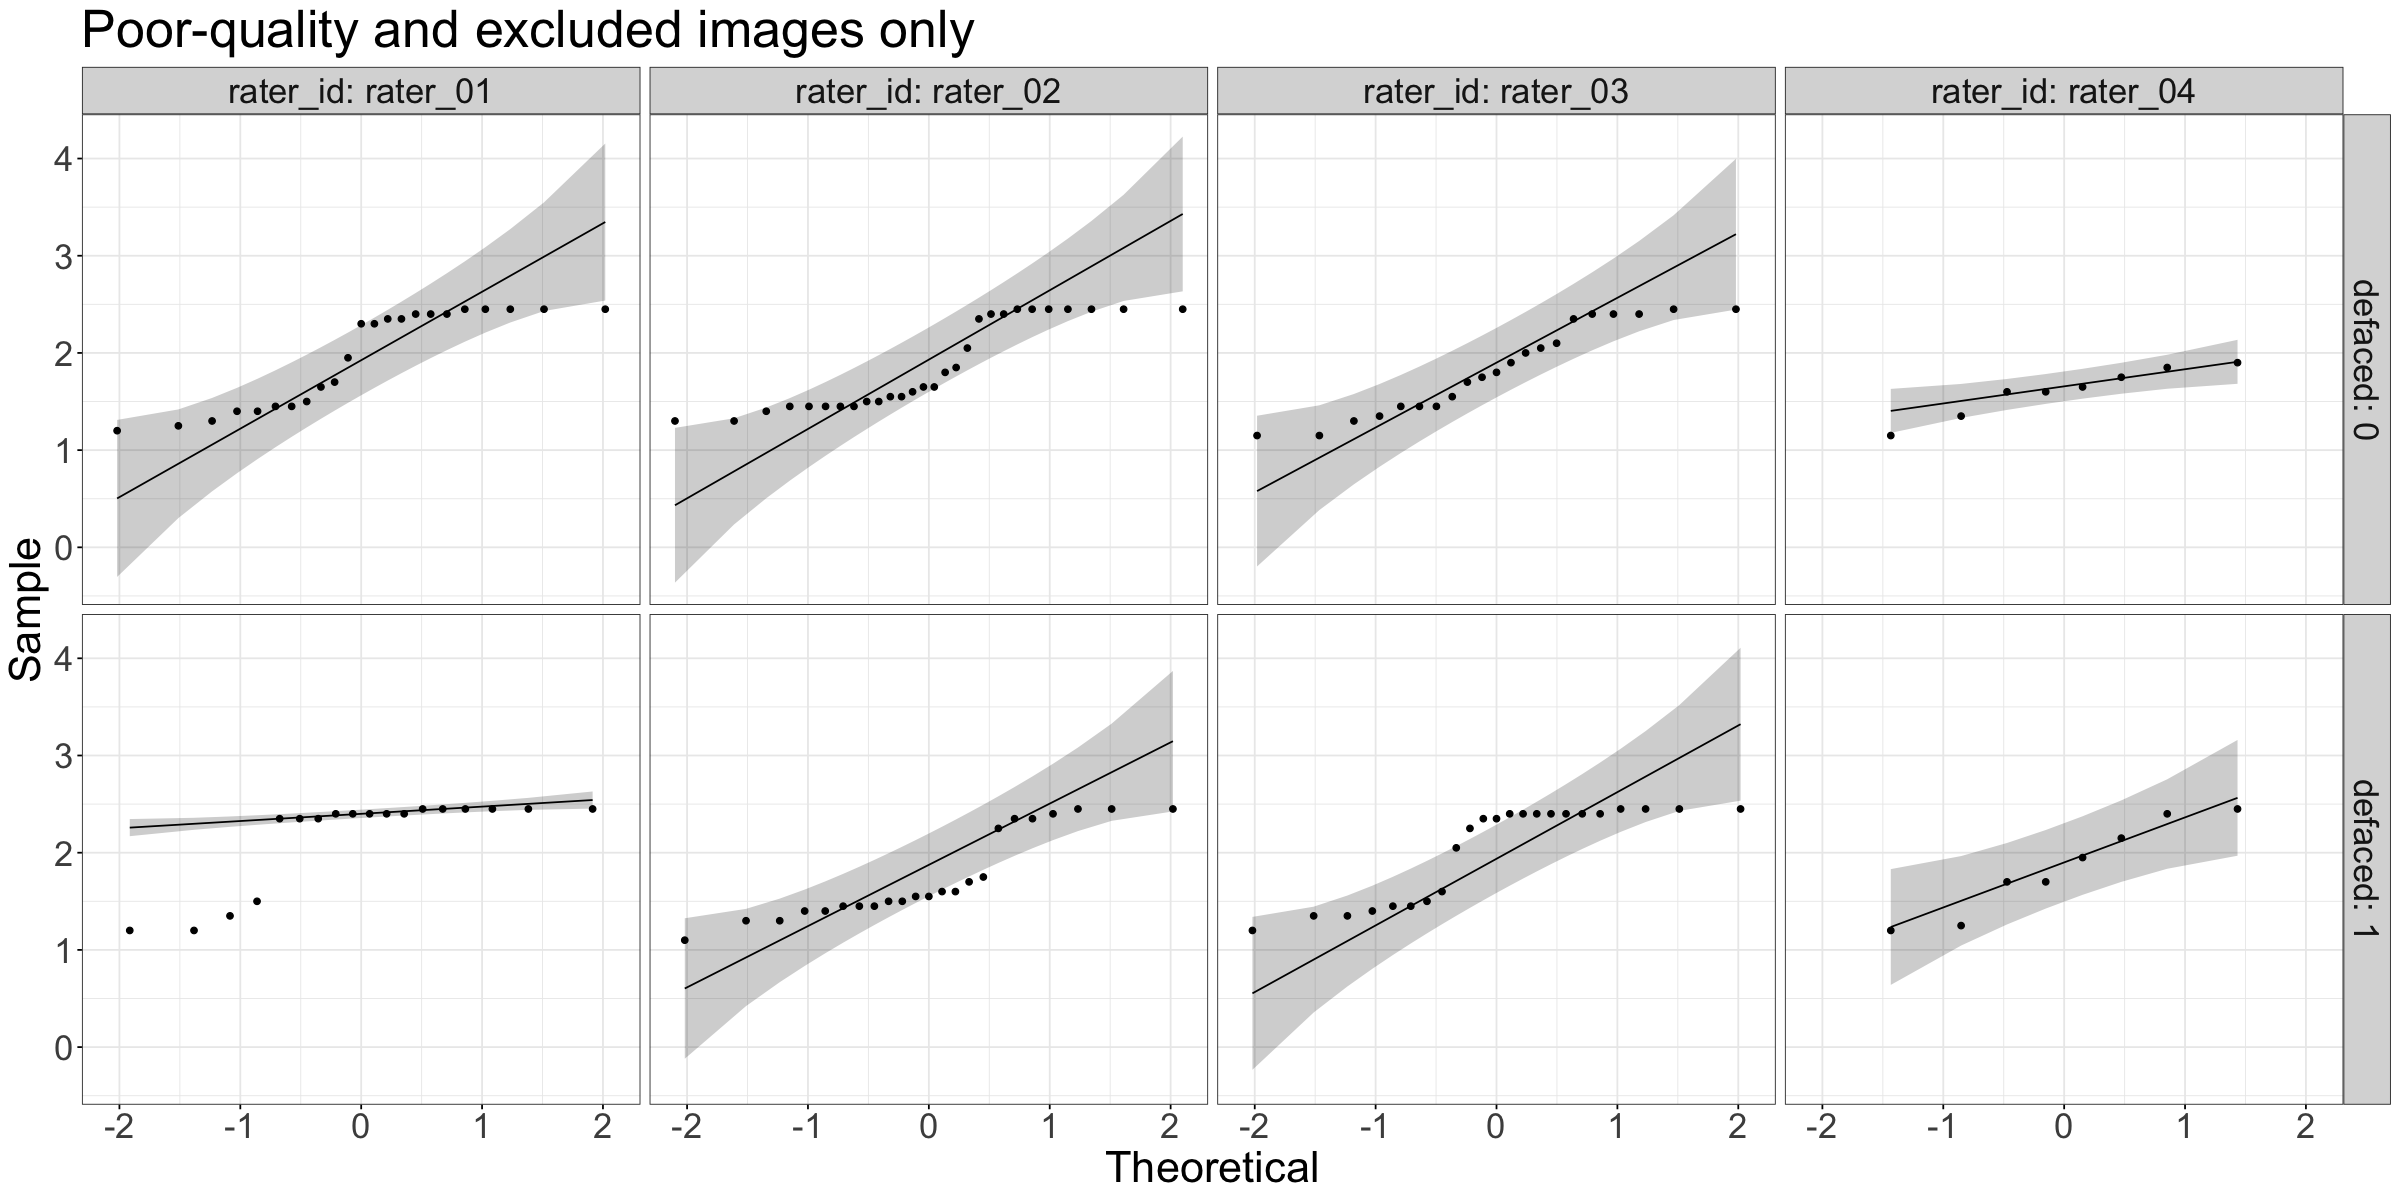

In [143]:
qq_poor <- ggqqplot(df_nodup_poor, "rating", ggtheme = theme_bw()) +
  facet_grid(defaced ~ rater_id, labeller = "label_both") +
  theme(text = element_text(size = 26)) +
  labs(title = "Poor-quality and excluded images only")

suppressWarnings(print(qq_poor))

In [144]:
suppressWarnings(anova_results <- anova_test(data = df_nodup_poor, dv = rating, wid = subject, within = c(defaced, rater_id), effect.size = "pes"))
print(anova_results)
# Extract p-values
p_poor <- anova_results$ANOVA$p

ANOVA Table (type III tests)

$ANOVA
            Effect DFn DFd     F     p p<.05   pes
1          defaced   1   3 9.768 0.052       0.765
2         rater_id   3   9 3.162 0.078       0.513
3 defaced:rater_id   3   9 1.167 0.375       0.280

$`Mauchly's Test for Sphericity`
            Effect        W     p p<.05
1         rater_id 0.143000 0.699      
2 defaced:rater_id 0.000143 0.022     *

$`Sphericity Corrections`
            Effect   GGe     DF[GG] p[GG] p[GG]<.05   HFe     DF[HF] p[HF]
1         rater_id 0.511  1.53, 4.6 0.139           0.937 2.81, 8.44 0.084
2 defaced:rater_id 0.428 1.28, 3.85 0.366           0.610 1.83, 5.49 0.372
  p[HF]<.05
1          
2          



## Split ANOVA per rater

In [145]:
p_vals <- c()
for (rater in sort(unique(df_nodup$rater_id))) {
  print(rater)
  df_rater <- subset(df_nodup, rater_id == rater)
  res_aov <- suppressWarnings(anova_test(data = df_rater, dv = rating, wid = subject, within = defaced, effect.size = "pes"))
  print(res_aov)
  #Extract p value
  p_vals <- append(p_vals, res_aov$p)
}
print("P-values:")
p_vals
#Correct p-values for multiple comparisons
print("P-values corrected for multiple comparisons using false discovery rate:")
p.adjust(p_vals, method = "fdr")

[1] "rater_01"
ANOVA Table (type III tests)

   Effect DFn DFd     F     p p<.05  pes
1 defaced   1 184 7.655 0.006     * 0.04
[1] "rater_02"
ANOVA Table (type III tests)

   Effect DFn DFd     F     p p<.05      pes
1 defaced   1 184 0.179 0.673       0.000971
[1] "rater_03"
ANOVA Table (type III tests)

   Effect DFn DFd    F     p p<.05   pes
1 defaced   1 184 3.87 0.051       0.021
[1] "rater_04"
ANOVA Table (type III tests)

   Effect DFn DFd     F     p p<.05      pes
1 defaced   1 184 0.054 0.816       0.000295
[1] "P-values:"


[1] 0.006 0.673 0.051 0.816

[1] "P-values corrected for multiple comparisons using false discovery rate:"


[1] 0.024 0.816 0.102 0.816

Only rater_01 appears to be significantly biased by defacing in his assessment of image quality at a significant level of 0.05, but that significance does not survive the pre-registered significance level of 0.02 and the multiple comparisons correction.

### Combine all QQ-plot

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]


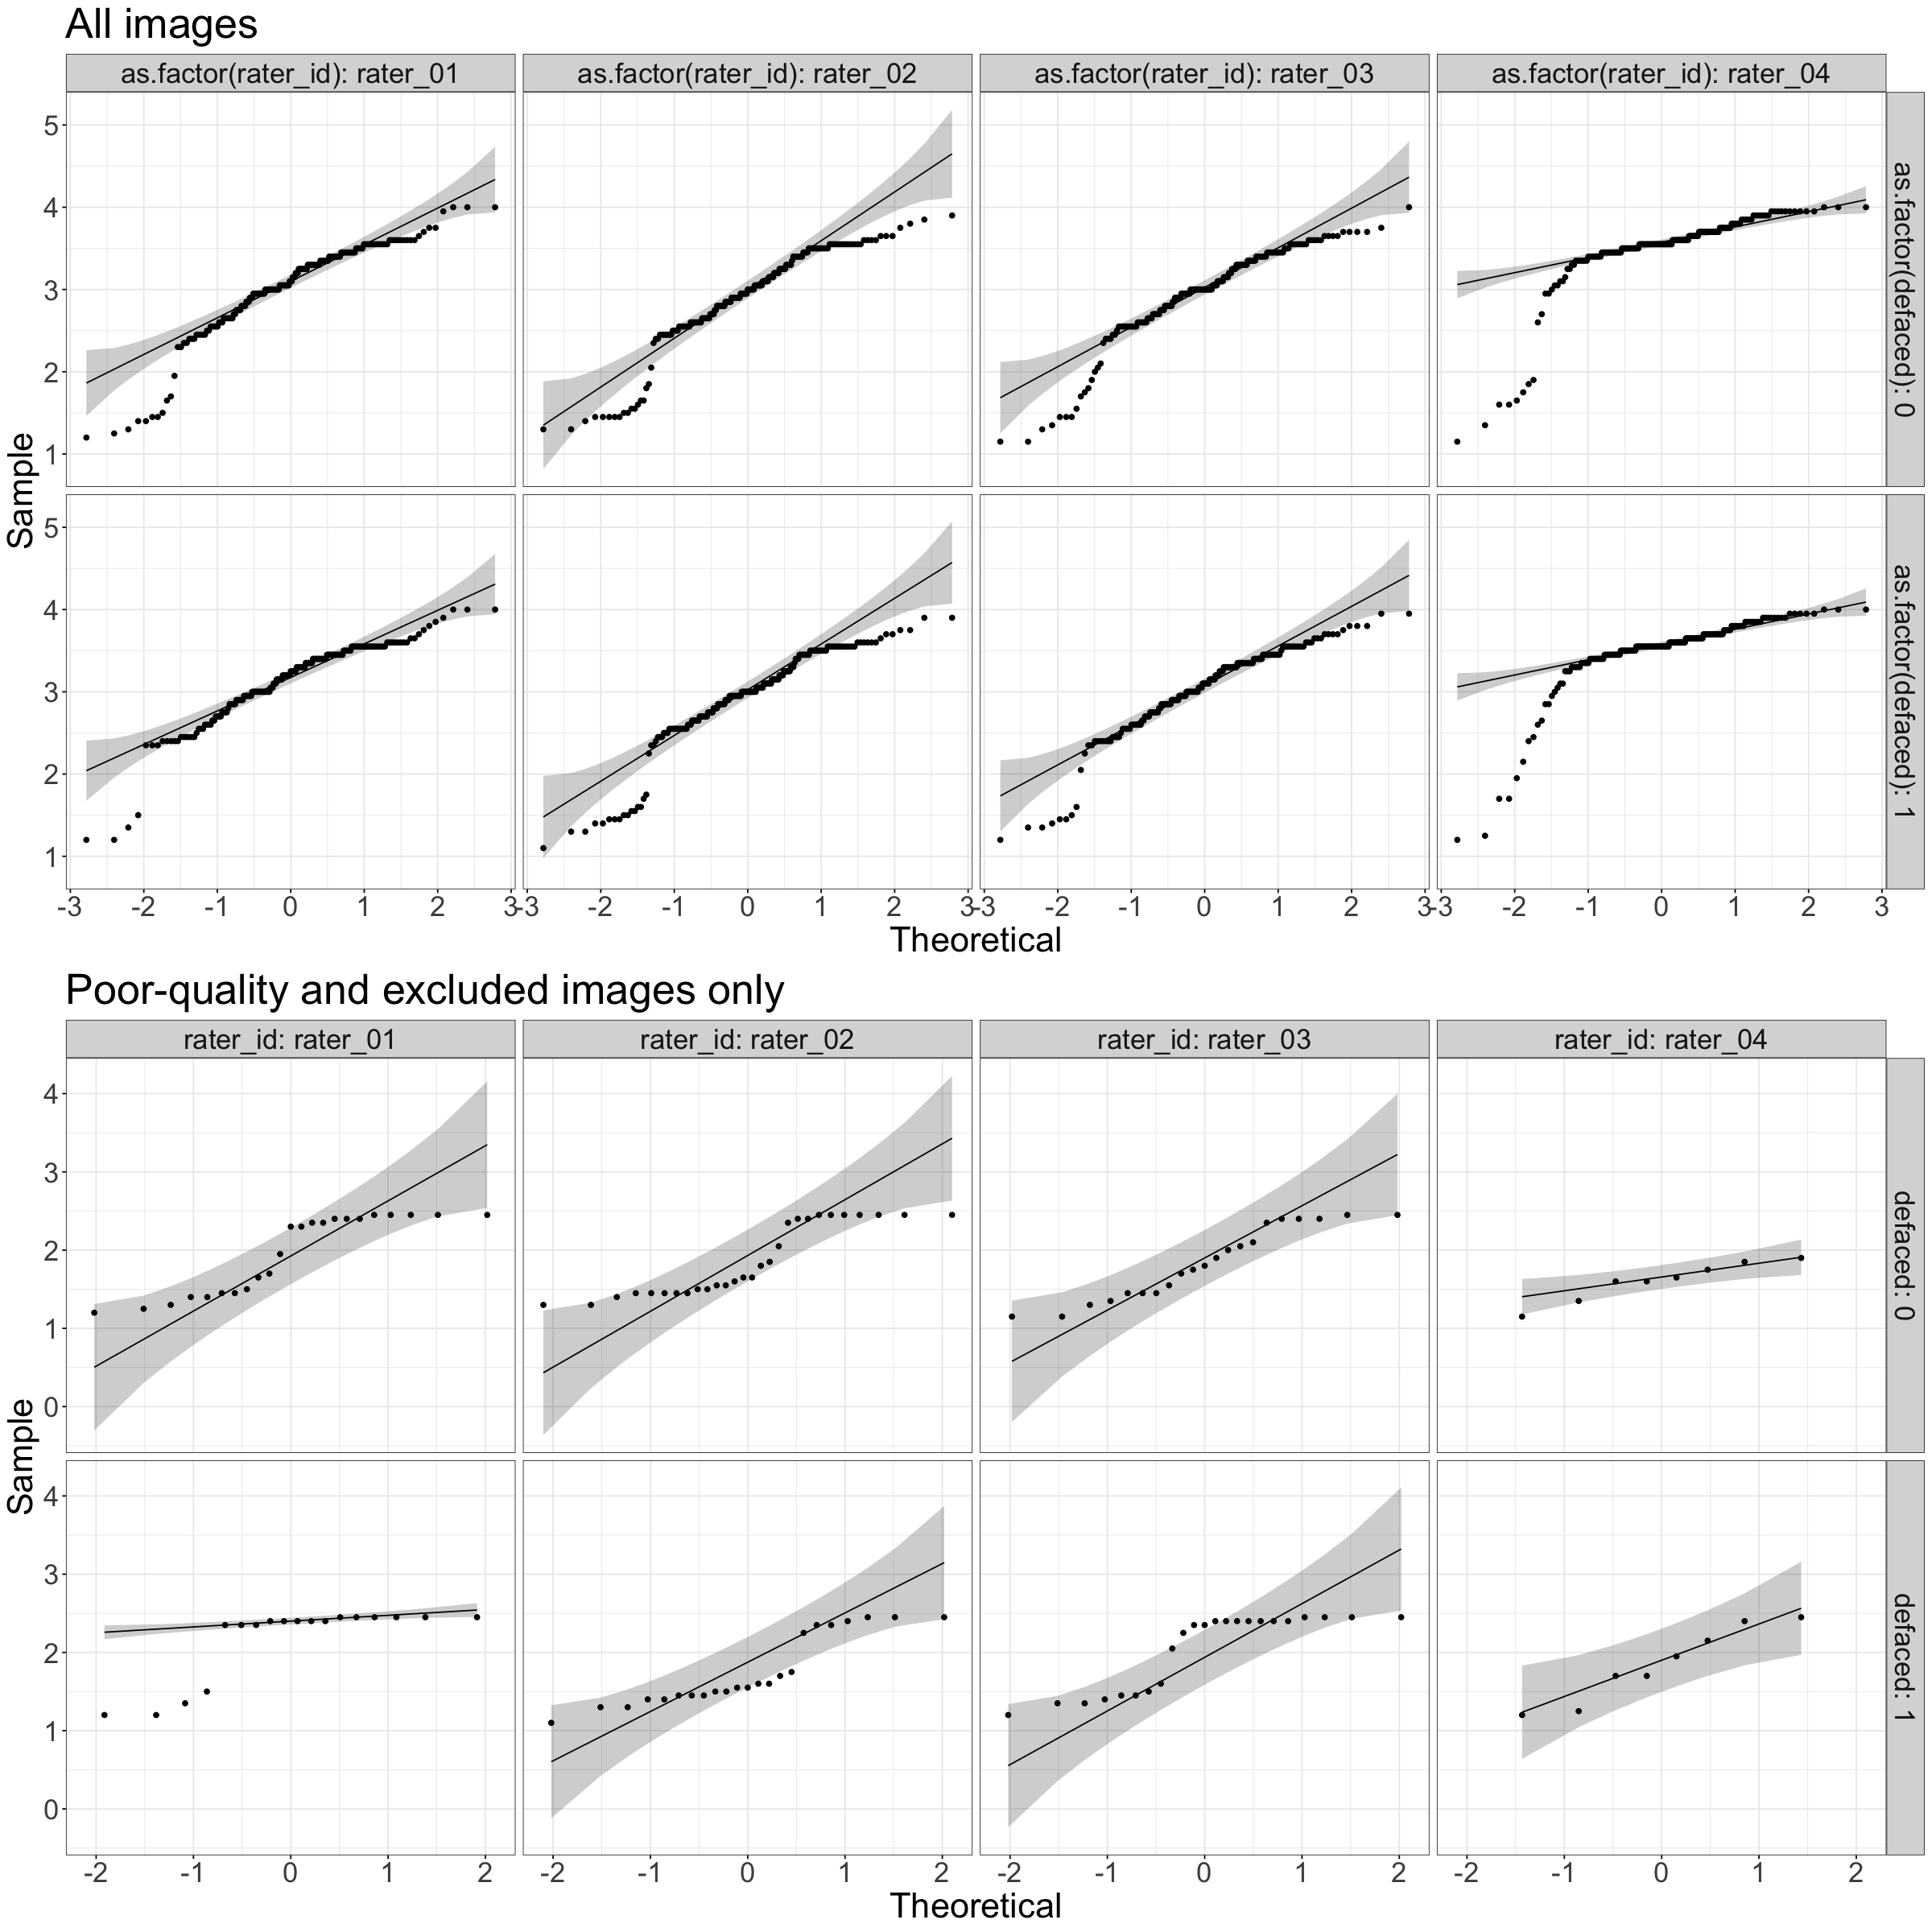

In [146]:
# Combine all diagnostic plots (p0 and p1) into a single figure
library(gridExtra)
library(grid)
options(repr.plot.width=20, repr.plot.height=20)

suppressWarnings(all_combined_plot <- grid.arrange(qq, qq_poor, ncol = 1))
print(all_combined_plot)

In [147]:
# Correct rm-ANOVA p-values for multiple comparisons
adjust_p_values <- function(p_values, method = "BH") {
  return(p.adjust(unlist(p_values), method = method))
}

p_vals <- mapply(c, p, p_w04, p_poor, SIMPLIFY = FALSE)

adjusted_p_values <- lapply(p_vals, adjust_p_values, method = "BH")
print("P-values:")
p_vals
#Correct p-values for multiple comparisons
print("P-values corrected for multiple comparisons using false discovery rate:")
adjusted_p_values

## The p-values linked to the effect of defacing need to be corrected taking into account the linear mixed effect models as well
#Extract only the first list in the list of p-values
p_vals_defaced <- p_vals[[1]]
# Append 1 to p_vals_defaced
p_vals_defaced <- append(p_vals_defaced, c(0.0122, 0.0076, 0.035))
print("P-values linked to the defaced effect corrected for multiple comparisons including lmer models using false discovery rate:")
p.adjust(p_vals_defaced, method = "fdr")

[1] "P-values:"


[[1]]
[1] 0.008 0.006 0.052

[[2]]
[1] 3.09e-74 5.35e-07 7.80e-02

[[3]]
[1] 0.141 0.232 0.375

[1] "P-values corrected for multiple comparisons using false discovery rate:"


[[1]]
[1] 0.012 0.012 0.052

[[2]]
[1] 9.270e-74 8.025e-07 7.800e-02

[[3]]
[1] 0.348 0.348 0.375

[1] "P-values linked to the defaced effect corrected for multiple comparisons including lmer models using false discovery rate:"


[1] 0.0160 0.0160 0.0520 0.0183 0.0160 0.0420

## Friedman test

Non-parametric alternative to repeated-measure ANOVA.

In [148]:
friedman.test(y=df$ratings, groups=factor(df$defaced), blocks=factor(df$sub))

ERROR: Error in friedman.test.default(y = df$ratings, groups = factor(df$defaced), : 'y', 'groups' et 'blocks' doivent avoir la m^eme longueur


Cannot use this function : An unreplicated complete block design has exactly 1 observation for each combination of the two grouping factors. But we have 4 observations of the combination defaced + sub 1 : rater01,02,03,04.